In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIGGEST_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data = np.load('./data_for_xi_calculation/dX_data_t=25_to_t=35_grid_32_decor_t_1Dt_config1.npz')

In [4]:
data.files

['dX_x', 'dX_y']

In [5]:
dX1 = data['dX_x']
dX2 = data['dX_y']

In [6]:
dX1.shape, dX2.shape

((250, 7392), (250, 7392))

In [7]:
dX = np.concatenate((dX1, dX2), axis=1)
dX.shape

(250, 14784)

In [8]:
m = dX.shape[0]
print(m)

250


In [9]:
from numpy import linalg as LA
from scipy import signal

In [10]:
Dt_c = 0.04
scaled_dX = dX/np.sqrt(Dt_c)

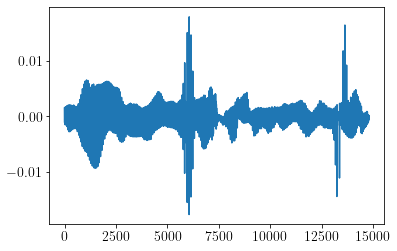

In [11]:
plt.plot(np.mean(scaled_dX, axis=0))

In [12]:
F = signal.detrend(scaled_dX, axis=0, type='constant')
F.shape

(250, 14784)

In [13]:
A, b, CT = LA.svd(F, full_matrices=False)

Text(0, 0.5, 'Eigenvalue, $\\lambda_i$')

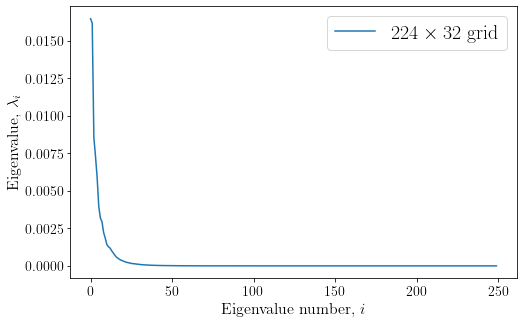

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(b**2/(m-1), label=r'$224 \times 32$ grid')
ax.legend()
ax.set_xlabel(r"Eigenvalue number, $i$")
ax.set_ylabel(r"Eigenvalue, $\lambda_i$")
# plt.savefig("./plots/eigenvalue_grid_32_t25_to_t55.pdf", bbox_inches='tight')

In [15]:
B = np.diag(b/np.sqrt(m-1))

In [16]:
B.shape, CT.shape

((250, 250), (250, 14784))

In [17]:
BCT = np.matmul(B, CT)

In [18]:
var_vec = b**2/(m-1)

In [19]:
n_eigval = 33

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total variance captured by first {n_eigval} eigenvalues: {p1}')

Total variance captured by first 33 eigenvalues: 99.08187007682197


In [20]:
n_eigval = 13

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 13 eigenvalues: 90.85308033036152


In [24]:
n_eigval = 6

p1 = 100*np.sum(var_vec[:n_eigval])/(np.sum(var_vec))

print(f'Total vairance captured by first {n_eigval} eigenvalues: {p1}')

Total vairance captured by first 6 eigenvalues: 73.23733266035634


In [28]:
combined_vec = BCT
detached_vec = np.zeros((combined_vec.shape[0],int(combined_vec.shape[1]/2),2))
for i in range(combined_vec.shape[0]):
    detached_vec[i,:,0] = combined_vec[i,:int(combined_vec.shape[1]/2)]
    detached_vec[i,:,1] = combined_vec[i,int(combined_vec.shape[1]/2):]
    
combined_vec.shape, detached_vec.shape

((250, 14784), (250, 7392, 2))

In [29]:
xi_mat = detached_vec

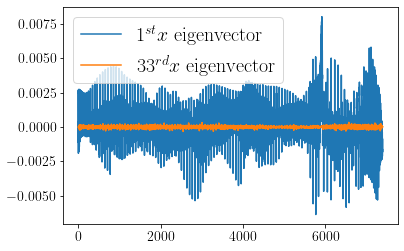

In [30]:
plt.plot(xi_mat[0,:,0], label=r'$1^{st} x$ eigenvector'), plt.plot(xi_mat[33,:,0], label=r'$33^{rd} x$ eigenvector')
plt.legend()

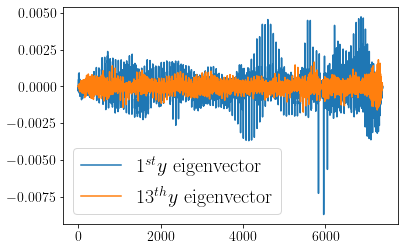

In [31]:
plt.plot(xi_mat[0,:,1], label=r'$1^{st} y$ eigenvector'), plt.plot(xi_mat[12,:,1], label=r'$13^{th} y$ eigenvector')
plt.legend()

In [32]:
eig_vec = xi_mat[:33,:,:]
eig_vec.shape

(33, 7392, 2)

In [33]:
data_file = './xi_vec_data/xi_matrix_33_eigv_grid_32_t=25_to_t=35_config1.npz'

np.savez(data_file, xi_mat = eig_vec)